In [85]:
import pandas as pd
df = pd.read_csv("births.csv")
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


### Question 1

In [86]:
new_col = (df["year"] - (df["year"]%10))
df["decade"] = new_col

In [87]:
df.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


### Question 2

In [88]:
df.describe()

,year,month,day,births,decade
count,15547.000000,15547.000000,15067.000000,15547.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561,1974.544285
std,6.728340,3.449632,15.284034,28552.465810,6.789583
min,1969.000000,1.000000,1.000000,1.000000,1960.000000
25%,1974.000000,4.000000,8.000000,4358.000000,1970.000000
50%,1979.000000,7.000000,16.000000,4814.000000,1970.000000
75%,1984.000000,10.000000,24.000000,5289.500000,1980.000000
max,2008.000000,12.000000,99.000000,199622.000000,2000.000000


### Question 3

In [89]:
df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
decade      0
dtype: int64

##### "Day" column contains 480 null values

### Question 4

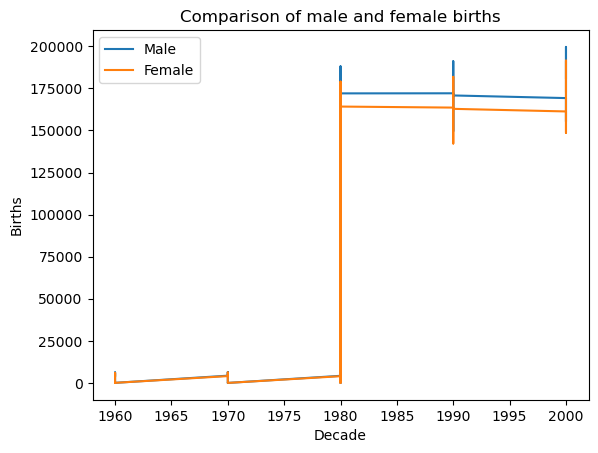

In [90]:
df_male = df[df["gender"] == "M"]
df_female = df[df["gender"] == "F"]
import matplotlib.pyplot as plt
plt.plot(df_male["decade"], df_male["births"], label = "Male")
plt.plot(df_female["decade"], df_female["births"], label = "Female")
plt.legend()
plt.xlabel("Decade")
plt.ylabel("Births")
plt.title("Comparison of male and female births")
plt.show()

### Question 5

In [91]:
mean = df["births"].mean()
std = df["births"].std()
threshold = std*5 - mean

In [92]:
df = df[df["births"] <= threshold]

In [93]:
df.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


### Question 6

In [94]:
df["day"].fillna(round(df["day"].mean()), inplace = True)

C:\Users\Ashhad\AppData\Local\Temp\ipykernel_15636\4015470271.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='weekday', y='births', hue='decade', ci=None)


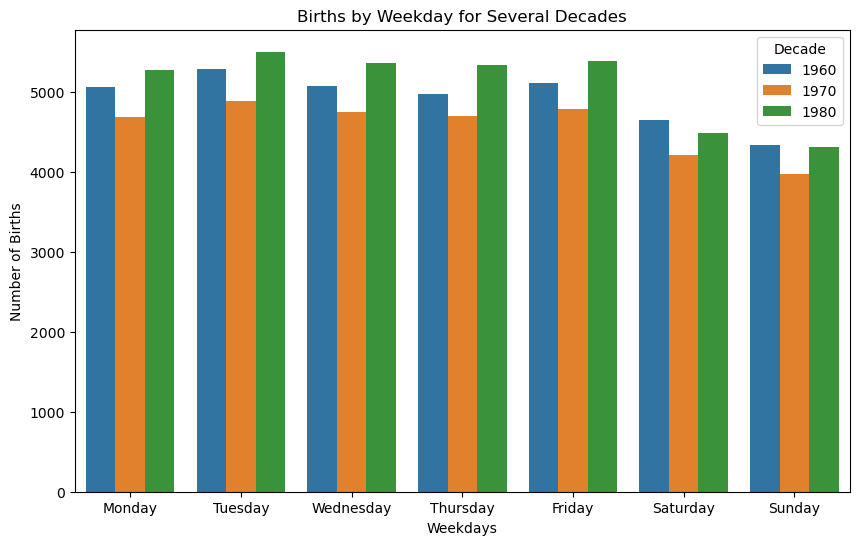

In [95]:
import seaborn as sns
df = df[df["day"] <= 31]
df['date'] = pd.to_datetime(df[['year', 'month', 'day']], errors='coerce')
df['weekday'] = df['date'].dt.weekday

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='weekday', y='births', hue='decade', ci=None)
plt.title('Births by Weekday for Several Decades')
plt.xlabel('Weekdays')
plt.ylabel('Number of Births')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title='Decade')
plt.show()

### Question 7

In [96]:
group_by_day = df.groupby(df["date"].dt.day)
group_by_month = df.groupby(df["date"].dt.month)

In [97]:
group_by_day.head()

,year,month,day,gender,births,decade,date,weekday
0,1969,1,1.0,F,4046,1960,1969-01-01,2.0
1,1969,1,1.0,M,4440,1960,1969-01-01,2.0
2,1969,1,2.0,F,4454,1960,1969-01-02,3.0
3,1969,1,2.0,M,4548,1960,1969-01-02,3.0
4,1969,1,3.0,F,4548,1960,1969-01-03,4.0
...,...,...,...,...,...,...,...,...
188,1969,3,31.0,F,4590,1960,1969-03-31,0.0
189,1969,3,31.0,M,5002,1960,1969-03-31,0.0
248,1969,4,29.0,F,4622,1960,1969-04-29,1.0
250,1969,4,30.0,F,4396,1960,1969-04-30,2.0


In [98]:
group_by_month.head(1)

,year,month,day,gender,births,decade,date,weekday
0,1969,1,1.0,F,4046,1960,1969-01-01,2.0
64,1969,2,1.0,F,4394,1960,1969-02-01,5.0
128,1969,3,1.0,F,4402,1960,1969-03-01,5.0
192,1969,4,1.0,F,4990,1960,1969-04-01,1.0
256,1969,5,1.0,F,4598,1960,1969-05-01,3.0
320,1969,6,1.0,F,4174,1960,1969-06-01,6.0
384,1969,7,1.0,F,5378,1960,1969-07-01,1.0
448,1969,8,1.0,F,5112,1960,1969-08-01,4.0
512,1969,9,1.0,F,4440,1960,1969-09-01,0.0
576,1969,10,1.0,F,5290,1960,1969-10-01,2.0


### Question 8

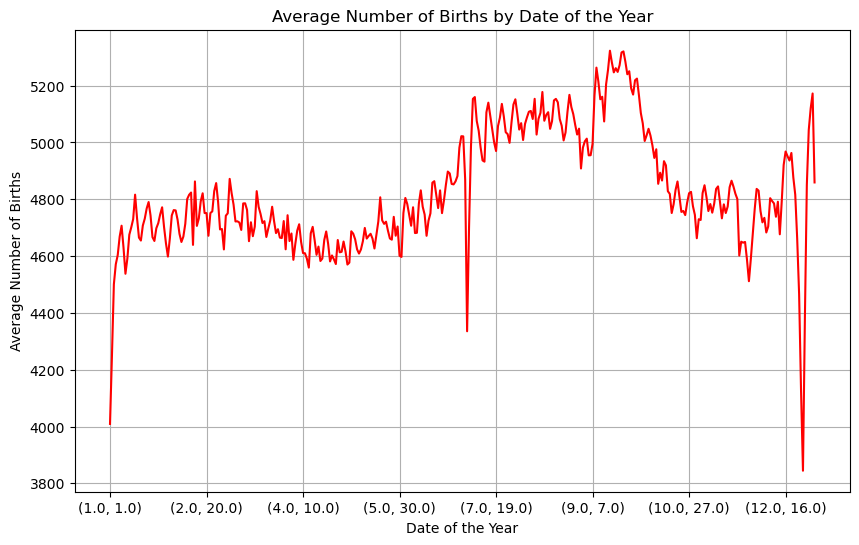

In [99]:
average_births_by_date = df.groupby([df["date"].dt.month, df["date"].dt.day])['births'].mean()

plt.figure(figsize=(10, 6))
average_births_by_date.plot(color='r')
plt.title('Average Number of Births by Date of the Year')
plt.xlabel('Date of the Year')
plt.ylabel('Average Number of Births')
plt.grid(True)
plt.show()